In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import networkx as nx   # install it if missing: !pip install networkx

In [4]:
from src.config.config import get_config
from src.context import context

In [20]:
context.environment = 'development'  # or 'dev', depends on your config files
context.config = get_config(context)

In [30]:
def draw_graph(graph, *, ax=None, save_path=None):
    if ax is None:
        ax = plt.axes()
    # NOTE: 
    # We need `.reverse` here because we have reversed
    # our adjacency list for convenience. You shouldn't
    # care about that detail.
    nx_graph = nx.DiGraph(graph.edges).reverse()
    nx.draw_networkx(nx_graph, ax=ax)
    if save_path is not None:
        ax.figure.savefig(save_path)

    return ax

In [31]:
from src.training.data import build_dataset  # the graph used for testing
graph = build_dataset()

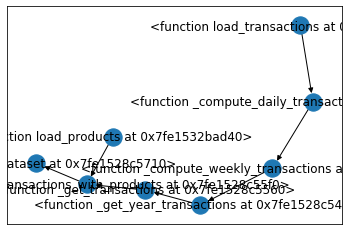

In [32]:
draw_graph(graph);

In [33]:
from src.libs.dag.utils import map_adjacency

In [34]:
def draw_graph(graph, *, ax=None, save_path=None):
    if ax is None:
        ax = plt.axes()

    # We use our utils function here: using the __name__
    # special attributes that is attached to every Python
    # functions or classes.
    adjacency = map_adjacency(lambda f: f.__name__, graph.edges)
    print(adjacency)
    nx_graph = nx.DiGraph(adjacency).reverse()
    nx.draw_networkx(nx_graph, ax=ax)
    if save_path is not None:
        ax.figure.savefig(save_path)
    return ax

{'_compute_daily_transactions': ['load_transactions'], '_compute_weekly_transactions': ['_compute_daily_transactions'], '_get_year_transactions': ['_compute_weekly_transactions'], '_get_transactions': ['_get_year_transactions'], '_merge_transactions_with_products': ['load_products', '_get_transactions'], '_save_dataset': ['_merge_transactions_with_products']}


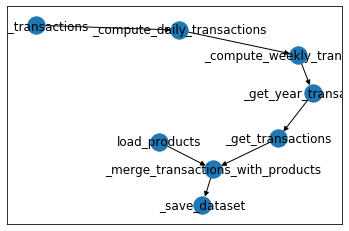

In [35]:
draw_graph(graph);

In [36]:
from pyvis.network import Network

In [37]:
def draw_graph(graph, *, path=None, backend='pyvis', ax=None):
    """
    Draw a graph using prefered backend.

    Args:
    -----
        graph: a `dag.graph.Graph` object
        path (Path|str): where to save the file (required for pyvis backend)
        backend: 'pyvis' or 'matplotlib'
        ax (matplotlib.pyplot.axes): optional for matplotlib
    """
    adjacency = map_adjacency(lambda f: f.__name__, graph.edges)
    nx_graph = nx.DiGraph(adjacency).reverse()
    
    if backend == 'matplotlib':
        if ax is None:
            ax = plt.axes()
        nx.draw_networkx(nx_graph, ax=ax)
        if path is not None:
            ax.figure.savefig(path)

        return ax

    elif backend == 'pyvis':
        assert path is not None, (
            "'path' is required if you're using pyvis backend."
        )
        net = Network(directed=True, notebook=True)
        net.from_nx(nx_graph)

        return net.show(str(path))

    else:
        raise NotImplementedError("Unknown backend.")

In [38]:
draw_graph(graph, path='graph.html')

In [39]:
def execute_graph(graph):
    for node in graph.topo_sorted():
        print(node)  # useless, but enough for now.

In [40]:
execute_graph(graph)

<function load_products at 0x7fe1532bad40>
<function load_transactions at 0x7fe1532baa70>
<function _compute_daily_transactions at 0x7fe152907f80>
<function _compute_weekly_transactions at 0x7fe152933170>
<function _get_year_transactions at 0x7fe1528c54d0>
<function _get_transactions at 0x7fe1528c5560>
<function _merge_transactions_with_products at 0x7fe1528c55f0>
<function _save_dataset at 0x7fe1528c5710>


In [41]:
def execute_graph(graph):
    for node in graph.topo_sorted():
        print(graph.get_node_dependencies(node))  # useless, but enough for now.

In [42]:
execute_graph(graph)

[]
[]
[<function load_transactions at 0x7fe1532baa70>]
[<function _compute_daily_transactions at 0x7fe152907f80>]
[<function _compute_weekly_transactions at 0x7fe152933170>]
[<function _get_year_transactions at 0x7fe1528c54d0>]
[<function load_products at 0x7fe1532bad40>, <function _get_transactions at 0x7fe1528c5560>]
[<function _merge_transactions_with_products at 0x7fe1528c55f0>]


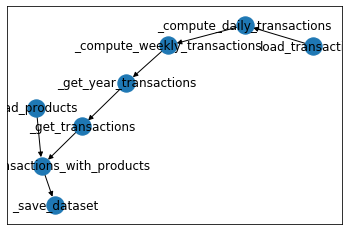

In [43]:
from src.training.data import build_dataset

graph = build_dataset()

# `draw_graph` was implemented in exercise 2
draw_graph(graph, path='graph.html')  # pyvis
# or
draw_graph(graph, backend='matplotlib');  # matplotlib

In [44]:
from src.libs.dag.executor import Executor

executor = Executor()
executor.execute(graph)  # graph = build_dataset()

[2021-11-30 15:46:02,630 | INFO]	NumExpr defaulting to 2 threads.
[2021-11-30 15:46:02,805 | INFO]	Dataset saved at data/raw/dataset.csv
[2021-11-30 15:46:02,806 | INFO]	Successfully executed <src.libs.dag.graph.Graph object at 0x7fe1527bacd0>.


In [45]:
l = [1,2,3]
def f(x):
    result = []
    for elt in x:
        result.append(elt+1)
    return result

In [68]:
f(l)

[2, 3, 4]

In [33]:
b = True
def f():
    if b :
        return{
        'products': 2,
        'transactions': 3
        }
    else:
        print('toto')

In [34]:
f()

{'products': 2, 'transactions': 3}

In [35]:
def f(x):
    return pow(x,2)

def g(x):
    return x/2

def h(z):
    return pow(z[0], 3) + pow(z[1], 3)

def identite(x, y):
    return (x, y)


x = 3
x_f = f(x)
x_g = g(x)

identity_func = identite(f(x), g(x))
# composition de la fonction identite avec la fonction h
x_f_g = h(identity_func)
x_f_g

732.375

In [36]:
def g(x):
    return x/2

In [37]:
def h(z):
    return pow(z[0], 3) + pow(z[1], 3)
    

In [38]:
def identite(x, y):
    return (x, y)


In [39]:
x = 3
x_f = f(x)
x_g = g(x)

identity_func = identite(f(x), g(x))
# composition de la fonction identite avec la fonction h
x_f_g = h(identity_func)
x_f_g

732.375

In [40]:
def identite(x, y):
    return x, y


In [41]:
identite(f(x), g(x))

(9, 1.5)

In [75]:
class Graph():
    def __init__(self, x):
        self.x = x
        self.states = {}
    def __repr__(self):
        return f'Graph({self.x})'
    def add_edge(self, source, target):
        

In [76]:
graph = Graph("gamma graph")
graph

Graph(gamma graph)